<a href="https://colab.research.google.com/github/abidshafee/DataScienceYouTubeTutorials/blob/master/KNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
file = files.upload()

Saving datasets_Iris.csv to datasets_Iris.csv


In [53]:
df = pd.read_csv('datasets_Iris.csv', index_col=0)

In [54]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Defining Input variables 'X', and targeted output 'y' 

### Converting Categorical Species column to numeric values

In [7]:
from sklearn.preprocessing import LabelEncoder

In [55]:
encodedOutput_Y = LabelEncoder()
df['Species'] = encodedOutput_Y.fit_transform(df.iloc[:,-1].values)

In [56]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


### Slicing Input variables and targeted output

In [80]:
numeric_df = df.iloc[:,0:4]

# drop the categorical Species column
# ty=df.drop('Species',axis=1)

# Targeted Output as pandas.Series
y = df[[df.columns[-1]]]

In [61]:
numeric_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [81]:
y

,Species
Id,
1,0
2,0
3,0
4,0
5,0
...,...
146,2
147,2
148,2


In [85]:
y.any()

Species    True
dtype: bool

### Scaling data for centering the dataset to origin 

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()
scaler.fit(numeric_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [65]:
scaled_data = scaler.transform(numeric_df)

In [ ]:
scaled_data

### Converting scaled data to a dataframe

In [68]:
scaled_df = pd.DataFrame(scaled_data, columns=df.columns[0:-1])

In [69]:
scaled_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


### Distribution of Data

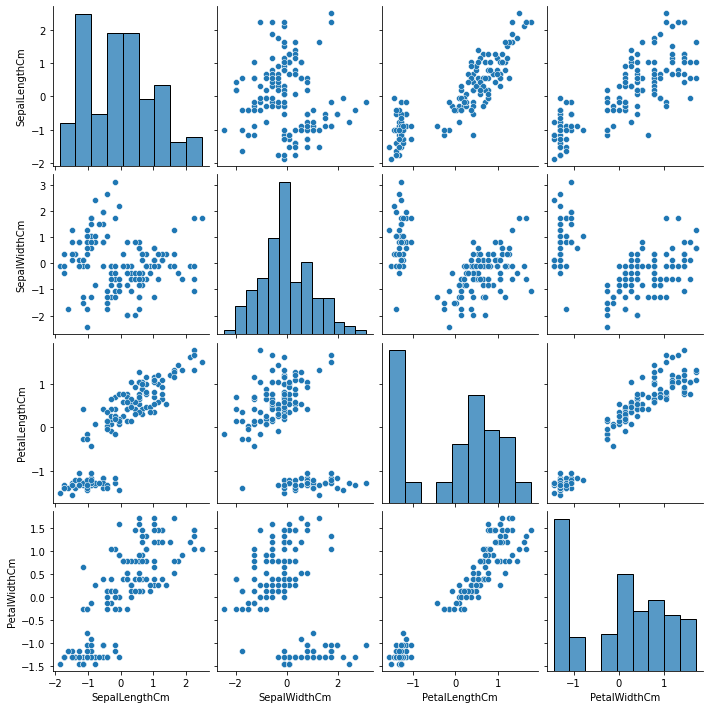

In [87]:
sns.pairplot(scaled_df) # hue=y when y datatype is boolean